In [1]:
import pandas as pd
import numpy as np
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
house_data['condition'].value_counts()

3    10216
4     4808
5     1425
2      141
1       23
Name: condition, dtype: int64

In [3]:
house_data['grade'].value_counts()

7     7278
8     4412
9     1816
6     1706
10     802
11     287
5      200
12      73
4       24
13      12
3        3
Name: grade, dtype: int64

In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16613 non-null  float64
 1   bedrooms       16613 non-null  int64  
 2   bathrooms      16613 non-null  float64
 3   sqft_living    16613 non-null  int64  
 4   sqft_lot       16613 non-null  int64  
 5   floors         16613 non-null  float64
 6   waterfront     16613 non-null  int64  
 7   view           16613 non-null  int64  
 8   condition      16613 non-null  int64  
 9   grade          16613 non-null  int64  
 10  sqft_above     16613 non-null  int64  
 11  sqft_basement  16613 non-null  int64  
 12  yr_built       16613 non-null  int64  
 13  yr_renovated   16613 non-null  int64  
 14  zipcode        16613 non-null  int64  
 15  lat            16613 non-null  float64
 16  long           16613 non-null  float64
 17  sqft_living15  16613 non-null  int64  
 18  sqft_l

In [5]:
X = house_data.drop('price', axis = 1)
y = house_data['price']

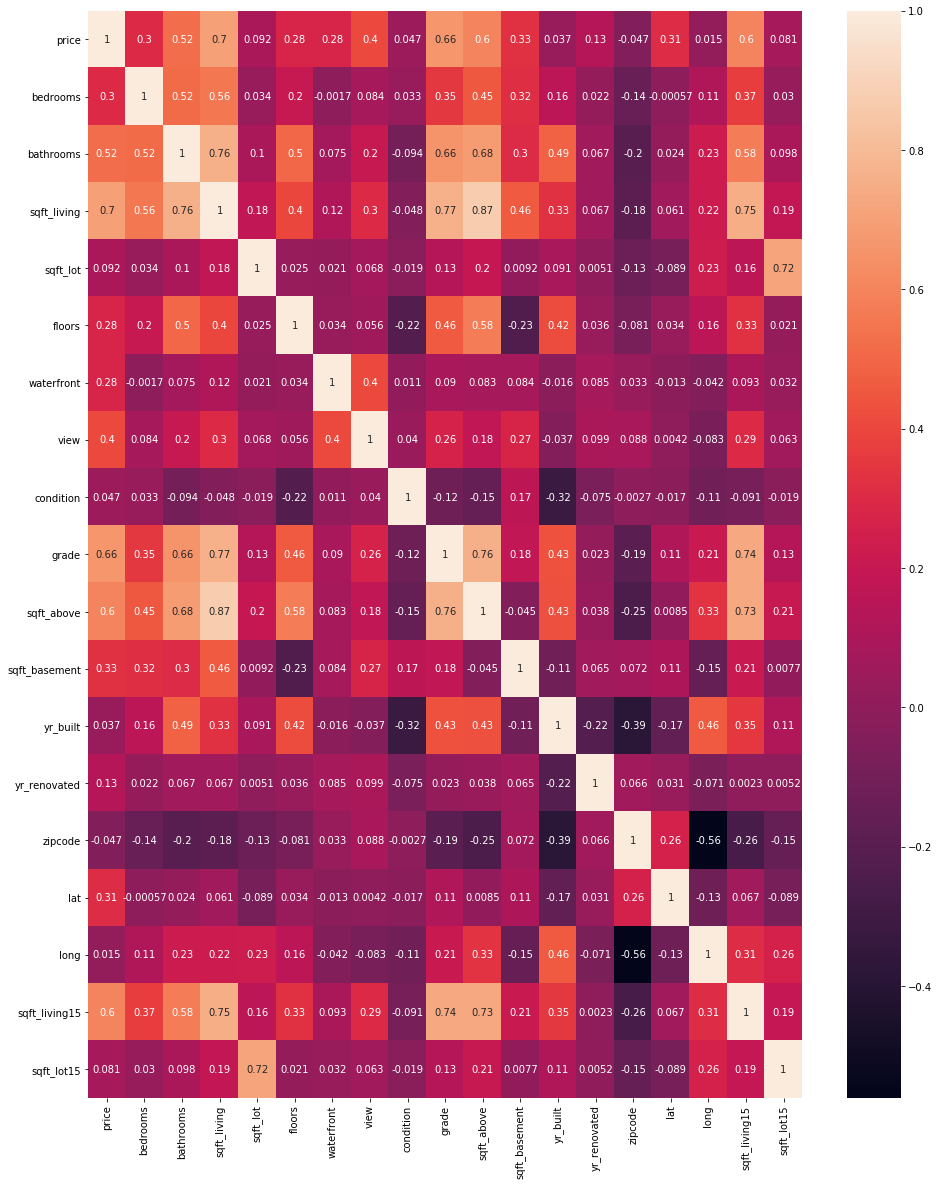

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,20))
sns.heatmap(house_data.corr(),annot =True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize = True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

207341.193048216

In [17]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [19]:
test_new.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5,3.25,5210,35765,2.5,0,4,5,10,4940,270,1911,0,98136,47.5463,-122.397,2590,10250
1,5,2.00,2800,17788,1.0,0,0,4,8,1400,1400,1963,0,98033,47.6719,-122.163,1760,18282
2,4,2.25,2060,44431,2.0,0,0,3,7,2060,0,1988,0,98077,47.7440,-122.046,2160,45657
3,5,2.00,2360,19899,1.0,0,0,4,7,2360,0,1968,0,98010,47.3299,-122.046,1860,19998
4,4,2.50,2370,6557,2.0,0,0,3,9,2370,0,1998,0,98042,47.4230,-122.155,2370,7378


In [20]:
price = model.predict(test_new)

In [21]:
res = pd.DataFrame(price)
res.index = test_new.index
res.columns = ['price']
res.to_csv('prediction_results.csv')